In [3]:
"""
Plot a 2d version of an arbitrary Light Curve from Stripe 82 data
Information on data columns found at:
http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_LC.html
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from skimage.transform import resize

In [10]:
def plot_2d_light_curve(file_path):
    """
    Plot a 2d light curve image
    """

    # Opening a light curve file
    with open(file_path, 'r') as f:
        next(f)
        df = pd.DataFrame(l.rstrip().split() for l in f)

    # Converting string to numeric
    for i in range(15):
        df[i] = pd.to_numeric(df[i])

    # Cleaning unphysical magnitudes
    df_u = df[df[1] > 1]
    df_g = df[df[4] > 1]
    df_r = df[df[7] > 1]
    df_i = df[df[10] > 1]
    df_z = df[df[13] > 1]

    # Gather the 5 band data and set mjd init == 0
    u_data = round(df_u[0]) - round(df_u[0].iloc[0])
    g_data = round(df_g[3]) - round(df_g[3].iloc[0])
    r_data = round(df_r[6]) - round(df_r[6].iloc[0])
    i_data = round(df_i[9]) - round(df_i[9].iloc[0])
    z_data = round(df_z[12]) - round(df_z[12].iloc[0])
    
    # Convert 5-band data into 5 (bands) x 3340 (days) image data
    Images = np.zeros((5, 3340))

    for i, day in enumerate(u_data):
        Images[0, int(day)] += df_u[1].iloc[i]

    for i, day in enumerate(g_data):
        Images[1, int(day)] += df_g[4].iloc[i]

    for i, day in enumerate(r_data):
        Images[2, int(day)] += df_r[7].iloc[i]

    for i, day in enumerate(i_data):
        Images[3, int(day)] += df_i[10].iloc[i]

    for i, day in enumerate(z_data):
        Images[4, int(day)] += df_z[13].iloc[i]
        
    reshape_img = Images.reshape(167, 100)
    

    # Plotting
    fig = plt.figure(figsize=(8, 5))
    sns.set(font='Times New Roman')
    sns.set_context('paper')
    plt.imshow(reshape_img)
    plt.colorbar()
    plt.title('Resize with Interpolation', fontsize=15)
    plt.show()


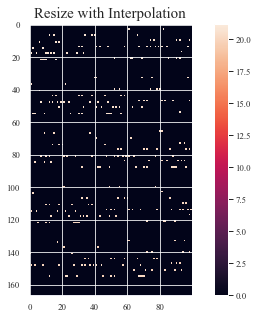

In [11]:
# Plot a 2d image of a light curve
plot_2d_light_curve('/Users/SnehPandya/Desktop/Black_Hole_NN_2/raw_data/original_LC/70')